# Lesson 2: Loops, Logic, and Functions

---

![Image of Yaktocat](https://github.com/AnastasisKratsios/Python_Basics/blob/main/Supporting_Documents/LogicalTest.png?raw=true)

---

In this notebook, we'll explore two fundamental concepts in Python: **loops** and **functions**. These are essential tools for controlling the flow of your program and creating reusable code blocks.


---

Before begining let's learn a trick!  

We'll be using functions we defined in a previous notebook, namely `1Numpy.ipynb`.  Using the following simple code snippet, we can run that notebook, and thus load all its functions into memory, without having to directly open it.  This will be helpful down the ways, when automating things.

In [19]:
# Run Previous Lesson's Notebook        
%run ./1_Numpy.ipynb

[1 2 3]
[[ 0.71167353 -0.32448496 -1.00187064]
 [ 0.23625079 -0.10215984 -1.14129263]
 [ 2.65440726  1.44060519  0.09890227]]
Shape of A: (3,)
Shape of B_2d: (2, 3)
Dimensionality of array_1d: 1
Dimensionality of array_2d: 2
Dimensionality of array_3d: 3
A as a List:
[1, 2, 3]
View A_list directly
A raised to the square
[1 4 9]

A raised to A_plus1
[ 1  8 81]
[[ 0.51241894 -0.84689693 -0.55676874]
 [-1.19901462  0.4508463  -0.51399059]
 [ 2.06317381  0.13258234 -0.62639763]]
Eigenvalues are: 
[ 1.43792651+0.j      -0.55052945+1.05319j -0.55052945-1.05319j]
Its Eigenvectors are:
[[-0.46554659+0.j          0.03071494+0.38426355j  0.03071494-0.38426355j]
 [ 0.78164594+0.j         -0.01522091+0.44409614j -0.01522091-0.44409614j]
 [-0.41508554+0.j          0.8086687 +0.j          0.8086687 -0.j        ]]
Sorry your matrix is not invertible!
first element: 1
third element: 3
Basic Slicing: [1]
Step: [1 2 3]
Negative Indices: [3 2 1]
Reshaped B_2d:
[[1 2 3]
 [4 5 6]]
Our frind B_2d has been c

Let's check if the `A_random` matrix, defined previously, is indeed captured in our working memory.

In [24]:
print(A_random)

[[ 0.71167353 -0.32448496 -1.00187064]
 [ 0.23625079 -0.10215984 -1.14129263]
 [ 2.65440726  1.44060519  0.09890227]]


---

---

---

Okay, let's get down to buisness...

## Loops
Loops are used to repeat a block of code multiple times. Python supports two main types of loops: **for loops** and **while loops**.

#### For Loops

For loops are often used to iterate over a sequence (like a list, tuple, or string) or a range of numbers.


In [1]:
# Iterate over a list
fruits = ["apple", "banana", "cherry"]
for fruit in fruits:
    print(fruit)

# Iterate through a range of numbers
for i in range(5):
    print(i)

apple
banana
cherry
0
1
2
3
4


#### While Loops

While loops execute a block of code repeatedly as long as a given condition is `True`.

Here's an example of a `while` loop.

In [2]:
count = 0
while count < 5:
    print(count)
    count += 1

0
1
2
3
4


### Nesting Loops
Loops can be nested.  Let's see how this can be used to populate a matrix of zeros.

In [3]:
# Initialize matrix
import numpy as np

A_zeros = np.zeros([10,5])

# Outer loop, runs over rows
for i in range(A_zeros.shape[0]):
    # Inner loop, runs over columns in a given row
    for j in range(A_zeros.shape[1]):
        A_zeros[i,j] = i+j

# Let's see the result
print(A_zeros)

[[ 0.  1.  2.  3.  4.]
 [ 1.  2.  3.  4.  5.]
 [ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10. 11.]
 [ 8.  9. 10. 11. 12.]
 [ 9. 10. 11. 12. 13.]]


**Pro-tip:** *Referring to your numpy dimensions directly with the `.shape` operations makes your code less susseptible to breaking if some, otherwise, hard-coded parameter is modified earlier on.*

## Functions

Functions allow you to encapsulate code into reusable blocks. They improve code organization and maintainability.

#### Defining a Function

Use the `def` keyword to define a function. Functions can accept parameters and return values.

In [4]:
def greet(name):
    """A function to greet the user."""
    print(f"Hello, {name}!")

def add(a, b):
    """A function to add two numbers."""
    return a + b

#### Using Functions

Call functions by their name, providing any required arguments. Capture and use return values if the function has one.

In [5]:
greet("Alice")          
sum_result = add(5, 7)  
print(sum_result)    

Hello, Alice!
12


Functions can greatly enhance code reusability and readability.

## Combining Loops and Functions

You can use loops to repeatedly call functions, making your code more efficient and dynamic.  For example, you can use a loop to call a function multiple times.

In [6]:
for i in range(3):
    greet("User " + str(i))

Hello, User 0!
Hello, User 1!
Hello, User 2!


## Functions with NumPy Arrays
Next, let's see how to apply functions on numpy arrays.  This, therefore, builds on our last lesson.

Let's start by defining a custom function that operates on individual elements, by squaring them and taking their cosine.

In [7]:
def custom_function(x):
    return np.cos(x ** 2)

To efficiently apply a function to a numpy array, we will use the `Vectorize` function, which has an input a function with float (scalar) inputs and outputs a has hash function.  Here, a `hash` function is a function which operators on NumPy arrays of arbitary, not predefined, size.

### Vectorization with NumPy

Now, you can apply the `square` function to a NumPy array using the array's built-in operations:

In [8]:
# Create a NumPy array
A = np.array([1, 2, 3, 4, 5])

Let's vectorized our custom function

In [9]:
custom_function__vectorized = np.vectorize(custom_function)

Let's apply the vectorizsed custom function and see the result.

In [10]:
# apply vectorized function
Vectorized_arr = custom_function__vectorized(A)

# print array
print(Vectorized_arr)

[ 0.54030231 -0.65364362 -0.91113026 -0.95765948  0.99120281]


### Lambda Functions

So-called **lambda functions**, which are small, anonymous functions, to apply custom operations. Here's how to square each element using a lambda function:

In [11]:
# Apply a lambda function to the array
result_lambda = np.vectorize(lambda x: custom_function(x))(A)

# readout
print(result_lambda)

[ 0.54030231 -0.65364362 -0.91113026 -0.95765948  0.99120281]


### Applying Functions Along Axes

You can also apply functions along specific axes of multidimensional arrays using functions like `np.apply_along_axis()`.

In [25]:
# Apply the custom function along columns (axis=0)
result_col = np.apply_along_axis(custom_function, axis=0, arr=A_random)

# Readout
result_col

array([[ 0.87445786,  0.99446208,  0.5371474 ],
       [ 0.99844278,  0.99994554,  0.26504199],
       [ 0.7229784 , -0.48341093,  0.99995216]])

### Summary - A note on Computational Efficiency

There are various other possibilities for applying a function to a NumPy array.  In general, like R, Python is most efficient when it comes to vectorial operations and **not** with loops.  Therefore, try and write your code as "vectorially as possible".  

To get this point across, let's peek at some perfomance comparisons of different ways to apply our custom function to some arrays.

**Comment:** *You'll have to install the `math` and `perfplot` packages.*

/home/annie/.local/lib/python3.9/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for Jupyter 
support
  warnings.warn('install "ipywidgets" for Jupyter support')

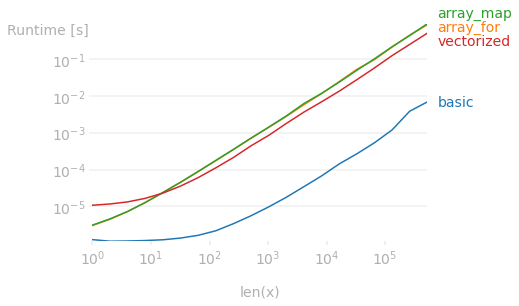

In [26]:
import perfplot
import math

def basic(x):
    return custom_function(x)

def array_for(x):
    return np.array([custom_function(xi) for xi in x])


def array_map(x):
    return np.array(list(map(custom_function, x)))


def vectorized(x):
    return custom_function__vectorized(x)


b = perfplot.bench(
    setup=np.random.rand,
    n_range=[2 ** k for k in range(20)],
    kernels=[
        basic,
        array_for,
        array_map,
        vectorized,
    ],
    xlabel="len(x)",
)
b.save("out1.svg")
b.show()

As we see, vectorize is faster than looping.  Also, (sometimes) the direct application of the functions is best.

## Logical Statements

One of the most basic things of any programming language, such as Python, is the ability to process logical statements based on their **truth value**.  Let's see how this can be done in Python.  

Let's do that in the context of a function definition.

In [27]:
def factorial(n):
    if n <= 1:
        return 1
    else:
        return n * factorial(n - 1)

Let's see how it works.

In [28]:
factorial_of_5 = factorial(5)

Let's check if the above output is positive, if so, then let's end on a positive note :)

In [29]:
if factorial_of_5 > 0:
    print('What a nice day!')
else:
    print('Bye for now!')

What a nice day!


### Example: Writing Functions with Loops in Them

Let's wrap up by bringing things together in writing a function which runs a loop.  This toy example illustrates how one can use: random samples, loops, and logic in functional programming; specifically Python.

Specifically, we'll now use a Monte Carlo simulation to estimate the value of $\pi$ by randomly generating points within a unit square and determining the ratio of points that fall inside a quarter circle inscribed within the square.

In [30]:
# Import Random Package
import random

# Generate Samples
def Generate_Approximation_to_PI(num_samples):
    inside_circle = 0
    
    for _ in range(num_samples):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        
        distance = x**2 + y**2
        
        if distance <= 1:
            inside_circle += 1
    
    pi_estimate = (inside_circle / num_samples) * 4
    return pi_estimate

Let's Run the code to see how it works.

First we define the number of samples to be used.

In [31]:
# Number of samples for the simulation
N_Samples = 10**5

In [32]:
# Calculate the estimated value of π using the Monte Carlo simulation
estimated_pi = Generate_Approximation_to_PI(N_Samples)
print("Our Estimate of Pi using"+str(N_Samples)+' samples.  Our estimate: '+str(estimated_pi)+'.')

Our Estimate of Pi using100000 samples.  Our estimate: 3.13844.


### Looping and Convergence
Let's see how the value changes as we increase the number of samples.  

In [33]:
import numpy as np

# Generate Powers of Samples
N_Samples_Array = np.arange(0,8)
N_Samples_Array = 10**N_Samples_Array

# Loop and observe convergence
for i in range(N_Samples_Array.shape[0]):
    # Get Number of Samples to be used in this loop
    N_Samples = N_Samples_Array[i]
    
    # Compute our Estimate of Pi
    estimated_pi = Generate_Approximation_to_PI(N_Samples)
    
    # Report Findings
    print("Our Estimate of Pi using"+str(N_Samples)+' samples.  Our estimate: '+str(estimated_pi)+'.')

Our Estimate of Pi using1 samples.  Our estimate: 0.0.
Our Estimate of Pi using10 samples.  Our estimate: 4.0.
Our Estimate of Pi using100 samples.  Our estimate: 3.2.
Our Estimate of Pi using1000 samples.  Our estimate: 3.164.
Our Estimate of Pi using10000 samples.  Our estimate: 3.1532.
Our Estimate of Pi using100000 samples.  Our estimate: 3.1444.
Our Estimate of Pi using1000000 samples.  Our estimate: 3.14048.
Our Estimate of Pi using10000000 samples.  Our estimate: 3.1406564.


Hmmm... that was slow towards the end.  For an impatient person such as myself, it would help to see a progress bar.  Luckily the `tqdm` packages provides precisely that time of functionality.  

Let's modify the previous code snippet to include the progress bar.

In [36]:
import numpy as np
from tqdm import tqdm # Progress bar package

# Generate Powers of Samples
N_Samples_Array = np.arange(0,8)
N_Samples_Array = 10**N_Samples_Array

# Loop and observe convergence
for i in tqdm(range(N_Samples_Array.shape[0])):
    # Get Number of Samples to be used in this loop
    N_Samples = N_Samples_Array[i]
    
    # Compute our Estimate of Pi
    estimated_pi = Generate_Approximation_to_PI(N_Samples)
    
    # Report Findings
    print("Our Estimate of Pi using"+str(N_Samples)+' samples.  Our estimate: '+str(estimated_pi)+'.')

 75%|███████▌  | 6/8 [00:00<00:00, 41.66it/s]

Our Estimate of Pi using1 samples.  Our estimate: 4.0.
Our Estimate of Pi using10 samples.  Our estimate: 1.6.
Our Estimate of Pi using100 samples.  Our estimate: 3.32.
Our Estimate of Pi using1000 samples.  Our estimate: 3.152.
Our Estimate of Pi using10000 samples.  Our estimate: 3.1544.
Our Estimate of Pi using100000 samples.  Our estimate: 3.14852.
Our Estimate of Pi using1000000 samples.  Our estimate: 3.141788.


100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

Our Estimate of Pi using10000000 samples.  Our estimate: 3.1422784.


## A Very Useful Example

We wrap-up with a very useful code snippet and exaple.  

In this lesson will use the following packages, which are automatially checked-for and installed via the following script.

In [37]:
# Let's import pip directly into our notebook
import pip

# Define Verification Function
def Verify_Install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])
        
# List of Packages for this Lesson
packages_to_be_verified_or_installed = np.array(['numpy','perfplot','math','random','tqdm'])

# Check Packages were installed and if not, install then
for i in range(packages_to_be_verified_or_installed.shape[0]):
    # Manual Progress Bar (since I'm assuming tqdm is possibly not installed)
    print('Current Iteration '+str(round(i/packages_to_be_verified_or_installed.shape[0],2))+'/1')
    # Get package to test
    package_installed_TorF = packages_to_be_verified_or_installed[i]
    # if we dont have it, we install it
    Verify_Install(package_installed_TorF)
    
# Notify upon completion
print('Done')

Current Iteration 0.0/1
Current Iteration 0.2/1
Current Iteration 0.4/1
Current Iteration 0.6/1
Current Iteration 0.8/1
Done


---
# Fin
---